I want to check whether there is a large difference between the private and central samples

In [7]:
sample_loc = '/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag'
feyn_loc = '/eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output'

p_file = 'NMSSM/btagsf/NMSSM_XYH_YToHH_6b_MX_700_MY_400_2M/ntuple.root'
c_file = 'Official_NMSSM/btagsf/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8/ntuple.root'

p_feyn = 'sf_NMSSM_XYH_YToHH_6b_MX_700_MY_400_2M.root'
c_feyn = 'maxbtag_sf_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root'

private = SixB(f'{sample_loc}/{p_file}', gnn_model = f'{feyn_loc}/{p_feyn}')
central = SixB(f'{sample_loc}/{c_file}', gnn_model = f'{feyn_loc}/{c_feyn}')

/eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
[12:48:46] Loading                                                 ]8;id=518177;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=539427;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#129\129]8;;\
           Summer2018UL/maxbtag/NMSSM/btagsf/NMSSM_XYH_YToHH_6b_MX              
           _700_MY_400_2M/ntuple.root...                                        
Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
[12:49:15] Loading                                                 ]8;id=612739;file:///uscms_data/d3/srosenzw/

In [8]:
ak.argsort(private.jet_btag, axis=1)[:,0], ak.argsort(central.jet_btag, axis=1)[:,0]

(<Array [5, 5, 5, 5, 5, 5, 5, ..., 5, 5, 5, 5, 5, 5, 5] type='1104047 * int64'>,
 <Array [5, 5, 5, 5, 5, 5, 5, 5, ..., 5, 5, 5, 5, 5, 5, 5] type='144942 * int64'>)

In [9]:
pt_bins = np.linspace(0, 350, 41)

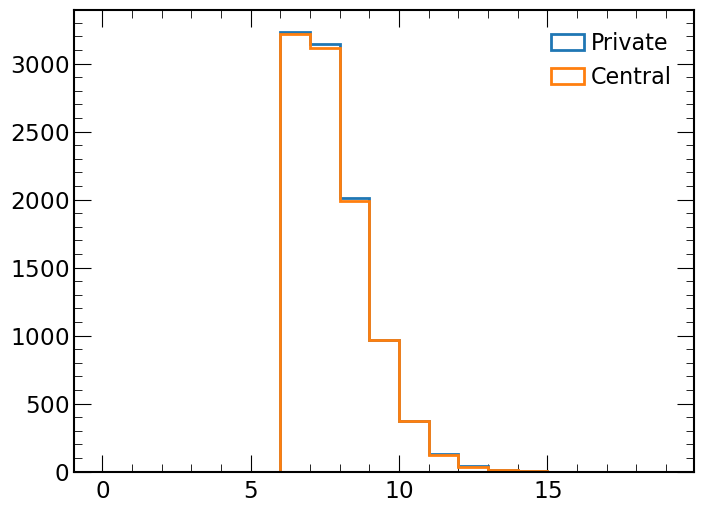

In [21]:
fig, ax = plt.subplots(figsize=(8,6))

n_p_bef = Hist(private.n_jet, bins=np.arange(20), ax=ax, weights=private.scale, label='Private')
n_c_bef = Hist(central.n_jet, bins=np.arange(20), ax=ax, weights=central.scale, label='Central')

ax.legend()

In [19]:
p_sf = private.get('bSFshape_central', library='np')
c_sf = central.get('bSFshape_central', library='np')

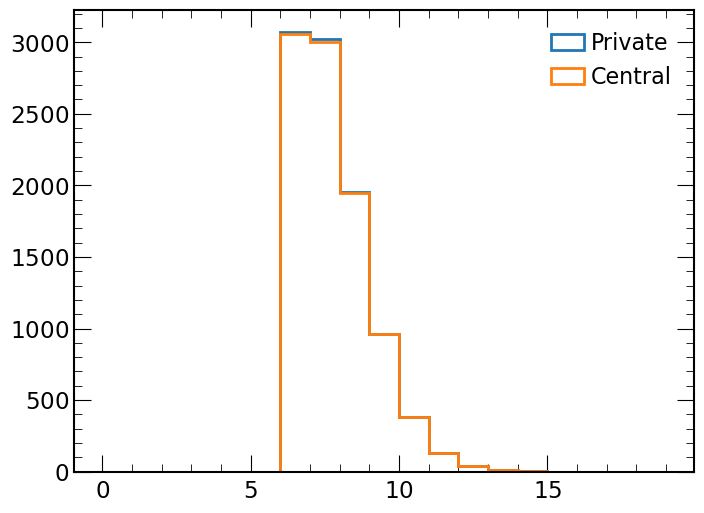

In [22]:
fig, ax = plt.subplots(figsize=(8,6))

n_p_aft = Hist(private.n_jet, bins=np.arange(20), ax=ax, label='Private', weights=p_sf*private.scale)
n_c_aft = Hist(central.n_jet, bins=np.arange(20), ax=ax, label='Central', weights=c_sf*central.scale)

ax.legend()

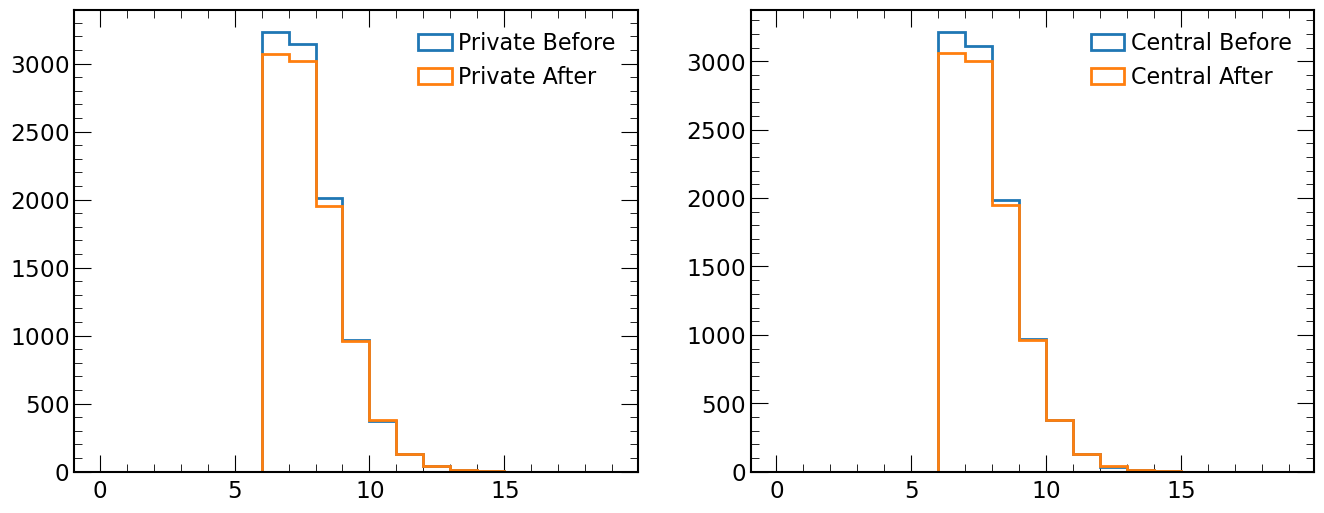

In [23]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6))

ax = axs[0]
n_p_bef = Hist(private.n_jet, bins=np.arange(20), ax=ax, weights=private.scale, label='Private Before')
n_p_aft = Hist(private.n_jet, bins=np.arange(20), ax=ax, label='Private After', weights=p_sf*private.scale)
ax.legend()

ax = axs[1]
n_c_bef = Hist(central.n_jet, bins=np.arange(20), ax=ax, weights=central.scale, label='Central Before')
n_c_aft = Hist(central.n_jet, bins=np.arange(20), ax=ax, label='Central After', weights=c_sf*central.scale)
ax.legend()